In [2]:
import pandas as pd
import pandas as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('kc_house_data.csv')

In [4]:
features = ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
              'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
              'long', 'sqft_living15', 'sqft_lot15']
X = data[features]  # All features except 'id'
y = data['price']

In [5]:
def extract_year(date_str):
  return pd.to_datetime(date_str).year  # Extract year from date string

X['date'] = X['date'].apply(extract_year)  # Apply function to each value

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-5-c0aa7fc18fbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = X['date'].apply(extract_year)  # Apply function to each value


In [6]:
X['date'] = pd.to_datetime(X['date'])  # Convert to DatetimeIndex

# You can now access year, month, day, etc. using attributes like:
X['year'] = X['date'].dt.year
X['month'] = X['date'].dt.month
X['day'] = X['date'].dt.day

<ipython-input-6-f83f621e6ee1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = pd.to_datetime(X['date'])  # Convert to DatetimeIndex
<ipython-input-6-f83f621e6ee1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['year'] = X['date'].dt.year


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
print(data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [11]:
!pip install numpy
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Use np.sqrt for square root from the numpy module
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 44965842000.20265
Root Mean Squared Error: 212051.5078941969
R-squared: 0.7025610536905744


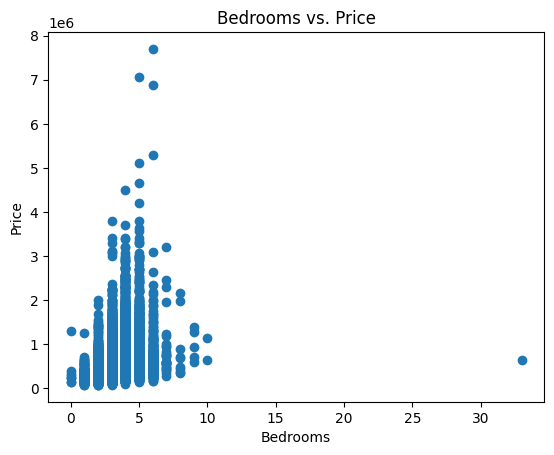

In [12]:
plt.scatter(X_train['bedrooms'], y_train)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs. Price')
plt.show()


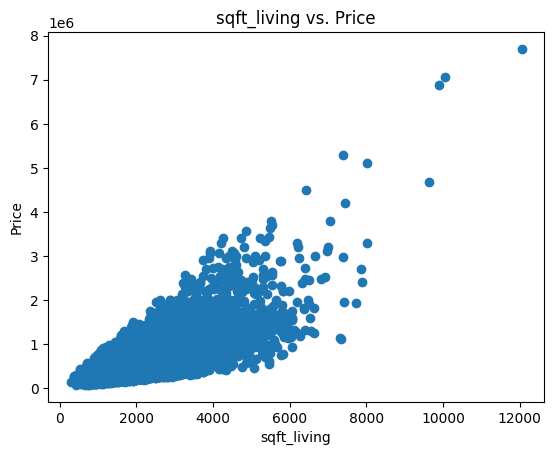

In [13]:
plt.scatter(X_train['sqft_living'], y_train)
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('sqft_living vs. Price')
plt.show()


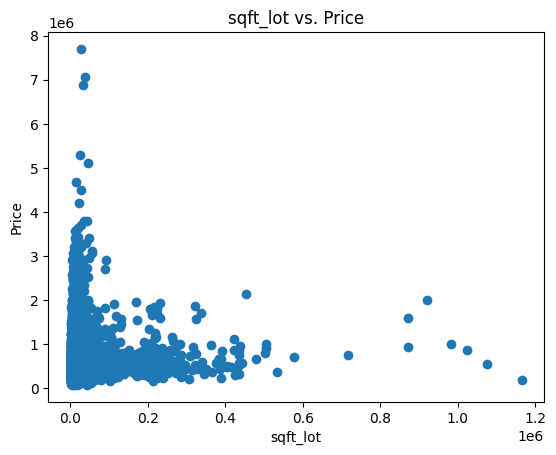

In [14]:
plt.scatter(X_train['sqft_lot'], y_train)
plt.xlabel('sqft_lot')
plt.ylabel('Price')
plt.title('sqft_lot vs. Price')
plt.show()


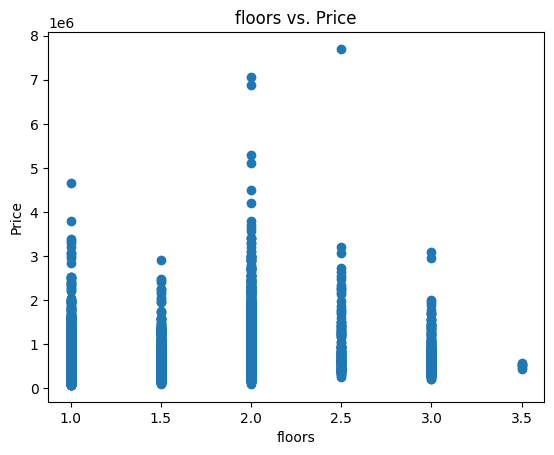

In [15]:
plt.scatter(X_train['floors'], y_train)
plt.xlabel('floors')
plt.ylabel('Price')
plt.title('floors vs. Price')
plt.show()


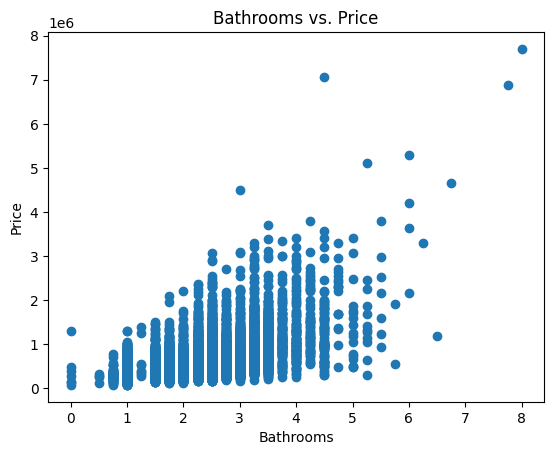

In [16]:
plt.scatter(X_train['bathrooms'], y_train)
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Bathrooms vs. Price')
plt.show()


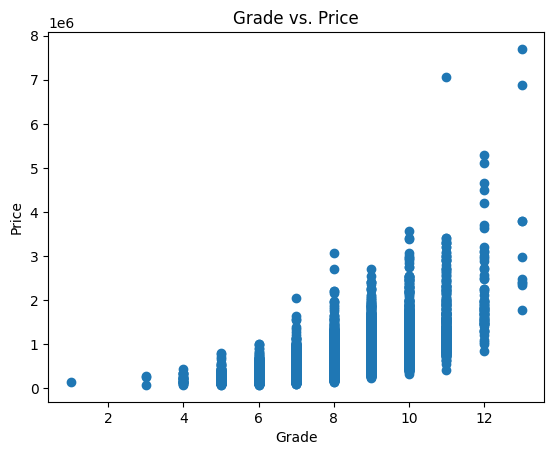

In [17]:
plt.scatter(X_train['grade'], y_train)
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Grade vs. Price')
plt.show()


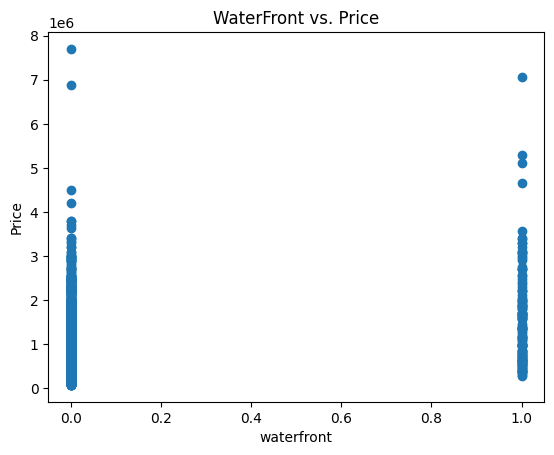

In [18]:
plt.scatter(X_train['waterfront'], y_train)
plt.xlabel('waterfront')
plt.ylabel('Price')
plt.title('WaterFront vs. Price')
plt.show()


In [19]:
print("Linear Regression Equation Coefficients:")
for i, coef in enumerate(model.coef_):
  print(f"Feature{i+1} coefficient: {coef}")  # Replace i+1 with actual feature index
print("Intercept:", model.intercept_)

Linear Regression Equation Coefficients:
Feature1 coefficient: 30293.77632561968
Feature2 coefficient: -34506.436236679074
Feature3 coefficient: 44584.57646417791
Feature4 coefficient: 109.11362781350549
Feature5 coefficient: 0.08695331749509835
Feature6 coefficient: 7593.17014781944
Feature7 coefficient: 563118.7602562845
Feature8 coefficient: 53296.006164243125
Feature9 coefficient: 25789.405688997875
Feature10 coefficient: 94756.76605904142
Feature11 coefficient: 69.97575773968194
Feature12 coefficient: 39.13787013170917
Feature13 coefficient: -2677.1202992488074
Feature14 coefficient: 21.474482789767663
Feature15 coefficient: -553.4306557522455
Feature16 coefficient: 598316.9031261181
Feature17 coefficient: -195124.030912794
Feature18 coefficient: 21.356737487659416
Feature19 coefficient: -0.3276047824147099
Intercept: -54453235.7752364


In [23]:
new_data = [3, 2.25, 1800, 0, 1,1,5,5,5,5,5,5,5,5,5,5,5,5,5]  # Remove the extra brackets
new_price_prediction = model.predict([new_data])[0]  # Keep the outer brackets for prediction
print("Predicted price for new data:", new_price_prediction)

Predicted price for new data: 31505211.348180592


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
